In [170]:
import pandas as pd
import numpy as np

import time
import requests
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

%matplotlib inline

In [98]:
years = [year for year in range(1946, 2026)]
months = ['september', 'october', 'november', 'december', 'january',
         'february', 'march', 'april', 'may', 'june', 'july']

urls = []
for year in years:
    league_string = f"BAA_{year}" if year < 1950 else f"NBA_{year}"
    for month in months:
        urls.append(f"https://www.basketball-reference.com/leagues/{league_string}_games-{month}.html")

start_time = time.time()
total_urls = len(urls)
processed = 0

df = pd.DataFrame()

for url in urls:
    
    try:
        resp = requests.get(url, timeout=10)
        resp.raise_for_status()

        resp.encoding = "utf-8"
        text = resp.text.replace("<!--", "").replace("-->", "")
        soup = BeautifulSoup(text, "html.parser")

        table = soup.find("table", {"id": "schedule"})
            
        if not table:
            continue
            
        headers, full_data = [], []
            
        header_rows = table.thead.find_all("tr")
        for hr in header_rows:
            if hr.get("class") is None:
                table_headers = hr.find_all('th')
                for th in table_headers:
                    headers.append(th.get('data-stat'))

        for tr in table.tbody.find_all("tr"):
            if tr.get("class") is None:
                row_data = []
                row_headers = tr.find('th')
                row_data.append(row_headers.get_text())
                table_data = tr.find_all('td')
                for td in table_data:
                    row_data.append(td.get_text())
                
                full_data.append(row_data)

        processed += 1
        elapsed = time.time() - start_time
        print(f"Processed {processed}/{total_urls} | Elapsed: {int(elapsed//60)}m {int(elapsed%60)}s | Success ({url})")

        time.sleep(5)

    except requests.exceptions.RequestException as e:
        processed += 1
        elapsed = time.time() - start_time
        print(f"Processed {processed}/{total_urls} | Elapsed: {int(elapsed//60)}m {int(elapsed%60)}s | Failed ({e})")
        
    data = pd.DataFrame(full_data, columns = headers)
    df = pd.concat([df, data])

Processed 1/880 | Elapsed: 0m 0s | Failed (404 Client Error: Not Found for url: https://www.basketball-reference.com/leagues/BAA_1946_games-september.html)
Processed 2/880 | Elapsed: 0m 0s | Failed (404 Client Error: Not Found for url: https://www.basketball-reference.com/leagues/BAA_1946_games-october.html)
Processed 3/880 | Elapsed: 0m 0s | Failed (404 Client Error: Not Found for url: https://www.basketball-reference.com/leagues/BAA_1946_games-november.html)
Processed 4/880 | Elapsed: 0m 0s | Failed (404 Client Error: Not Found for url: https://www.basketball-reference.com/leagues/BAA_1946_games-december.html)
Processed 5/880 | Elapsed: 0m 1s | Failed (404 Client Error: Not Found for url: https://www.basketball-reference.com/leagues/BAA_1946_games-january.html)
Processed 6/880 | Elapsed: 0m 1s | Failed (404 Client Error: Not Found for url: https://www.basketball-reference.com/leagues/BAA_1946_games-february.html)
Processed 7/880 | Elapsed: 0m 1s | Failed (404 Client Error: Not Found 

Processed 61/880 | Elapsed: 2m 42s | Success (https://www.basketball-reference.com/leagues/NBA_1951_games-february.html)
Processed 62/880 | Elapsed: 2m 47s | Success (https://www.basketball-reference.com/leagues/NBA_1951_games-march.html)
Processed 63/880 | Elapsed: 2m 53s | Success (https://www.basketball-reference.com/leagues/NBA_1951_games-april.html)
Processed 64/880 | Elapsed: 2m 58s | Failed (404 Client Error: Not Found for url: https://www.basketball-reference.com/leagues/NBA_1951_games-may.html)
Processed 65/880 | Elapsed: 2m 58s | Failed (404 Client Error: Not Found for url: https://www.basketball-reference.com/leagues/NBA_1951_games-june.html)
Processed 66/880 | Elapsed: 2m 58s | Failed (404 Client Error: Not Found for url: https://www.basketball-reference.com/leagues/NBA_1951_games-july.html)
Processed 67/880 | Elapsed: 2m 59s | Failed (404 Client Error: Not Found for url: https://www.basketball-reference.com/leagues/NBA_1952_games-september.html)
Processed 68/880 | Elapsed:

Processed 123/880 | Elapsed: 6m 2s | Success (https://www.basketball-reference.com/leagues/NBA_1957_games-october.html)
Processed 124/880 | Elapsed: 6m 8s | Success (https://www.basketball-reference.com/leagues/NBA_1957_games-november.html)
Processed 125/880 | Elapsed: 6m 13s | Success (https://www.basketball-reference.com/leagues/NBA_1957_games-december.html)
Processed 126/880 | Elapsed: 6m 19s | Success (https://www.basketball-reference.com/leagues/NBA_1957_games-january.html)
Processed 127/880 | Elapsed: 6m 24s | Success (https://www.basketball-reference.com/leagues/NBA_1957_games-february.html)
Processed 128/880 | Elapsed: 6m 30s | Success (https://www.basketball-reference.com/leagues/NBA_1957_games-march.html)
Processed 129/880 | Elapsed: 6m 35s | Success (https://www.basketball-reference.com/leagues/NBA_1957_games-april.html)
Processed 130/880 | Elapsed: 6m 40s | Failed (404 Client Error: Not Found for url: https://www.basketball-reference.com/leagues/NBA_1957_games-may.html)
Pro

Processed 187/880 | Elapsed: 9m 52s | Failed (404 Client Error: Not Found for url: https://www.basketball-reference.com/leagues/NBA_1962_games-july.html)
Processed 188/880 | Elapsed: 9m 53s | Failed (404 Client Error: Not Found for url: https://www.basketball-reference.com/leagues/NBA_1963_games-september.html)
Processed 189/880 | Elapsed: 9m 53s | Success (https://www.basketball-reference.com/leagues/NBA_1963_games-october.html)
Processed 190/880 | Elapsed: 9m 58s | Success (https://www.basketball-reference.com/leagues/NBA_1963_games-november.html)
Processed 191/880 | Elapsed: 10m 4s | Success (https://www.basketball-reference.com/leagues/NBA_1963_games-december.html)
Processed 192/880 | Elapsed: 10m 9s | Success (https://www.basketball-reference.com/leagues/NBA_1963_games-january.html)
Processed 193/880 | Elapsed: 10m 15s | Success (https://www.basketball-reference.com/leagues/NBA_1963_games-february.html)
Processed 194/880 | Elapsed: 10m 20s | Success (https://www.basketball-referen

Processed 249/880 | Elapsed: 13m 32s | Success (https://www.basketball-reference.com/leagues/NBA_1968_games-march.html)
Processed 250/880 | Elapsed: 13m 37s | Success (https://www.basketball-reference.com/leagues/NBA_1968_games-april.html)
Processed 251/880 | Elapsed: 13m 43s | Success (https://www.basketball-reference.com/leagues/NBA_1968_games-may.html)
Processed 252/880 | Elapsed: 13m 48s | Failed (404 Client Error: Not Found for url: https://www.basketball-reference.com/leagues/NBA_1968_games-june.html)
Processed 253/880 | Elapsed: 13m 48s | Failed (404 Client Error: Not Found for url: https://www.basketball-reference.com/leagues/NBA_1968_games-july.html)
Processed 254/880 | Elapsed: 13m 48s | Failed (404 Client Error: Not Found for url: https://www.basketball-reference.com/leagues/NBA_1969_games-september.html)
Processed 255/880 | Elapsed: 13m 49s | Success (https://www.basketball-reference.com/leagues/NBA_1969_games-october.html)
Processed 256/880 | Elapsed: 13m 54s | Success (ht

Processed 312/880 | Elapsed: 17m 41s | Success (https://www.basketball-reference.com/leagues/NBA_1974_games-january.html)
Processed 313/880 | Elapsed: 17m 47s | Success (https://www.basketball-reference.com/leagues/NBA_1974_games-february.html)
Processed 314/880 | Elapsed: 17m 52s | Success (https://www.basketball-reference.com/leagues/NBA_1974_games-march.html)
Processed 315/880 | Elapsed: 17m 57s | Success (https://www.basketball-reference.com/leagues/NBA_1974_games-april.html)
Processed 316/880 | Elapsed: 18m 4s | Success (https://www.basketball-reference.com/leagues/NBA_1974_games-may.html)
Processed 317/880 | Elapsed: 18m 9s | Failed (404 Client Error: Not Found for url: https://www.basketball-reference.com/leagues/NBA_1974_games-june.html)
Processed 318/880 | Elapsed: 18m 9s | Failed (404 Client Error: Not Found for url: https://www.basketball-reference.com/leagues/NBA_1974_games-july.html)
Processed 319/880 | Elapsed: 18m 9s | Failed (404 Client Error: Not Found for url: https:/

Processed 376/880 | Elapsed: 22m 17s | Success (https://www.basketball-reference.com/leagues/NBA_1980_games-november.html)
Processed 377/880 | Elapsed: 22m 23s | Success (https://www.basketball-reference.com/leagues/NBA_1980_games-december.html)
Processed 378/880 | Elapsed: 22m 28s | Success (https://www.basketball-reference.com/leagues/NBA_1980_games-january.html)
Processed 379/880 | Elapsed: 22m 34s | Success (https://www.basketball-reference.com/leagues/NBA_1980_games-february.html)
Processed 380/880 | Elapsed: 22m 39s | Success (https://www.basketball-reference.com/leagues/NBA_1980_games-march.html)
Processed 381/880 | Elapsed: 22m 45s | Success (https://www.basketball-reference.com/leagues/NBA_1980_games-april.html)
Processed 382/880 | Elapsed: 22m 50s | Success (https://www.basketball-reference.com/leagues/NBA_1980_games-may.html)
Processed 383/880 | Elapsed: 22m 55s | Failed (404 Client Error: Not Found for url: https://www.basketball-reference.com/leagues/NBA_1980_games-june.ht

Processed 440/880 | Elapsed: 26m 55s | Failed (404 Client Error: Not Found for url: https://www.basketball-reference.com/leagues/NBA_1986_games-september.html)
Processed 441/880 | Elapsed: 26m 55s | Success (https://www.basketball-reference.com/leagues/NBA_1986_games-october.html)
Processed 442/880 | Elapsed: 27m 0s | Success (https://www.basketball-reference.com/leagues/NBA_1986_games-november.html)
Processed 443/880 | Elapsed: 27m 6s | Success (https://www.basketball-reference.com/leagues/NBA_1986_games-december.html)
Processed 444/880 | Elapsed: 27m 12s | Success (https://www.basketball-reference.com/leagues/NBA_1986_games-january.html)
Processed 445/880 | Elapsed: 27m 17s | Success (https://www.basketball-reference.com/leagues/NBA_1986_games-february.html)
Processed 446/880 | Elapsed: 27m 22s | Success (https://www.basketball-reference.com/leagues/NBA_1986_games-march.html)
Processed 447/880 | Elapsed: 27m 28s | Success (https://www.basketball-reference.com/leagues/NBA_1986_games-a

Processed 504/880 | Elapsed: 31m 24s | Success (https://www.basketball-reference.com/leagues/NBA_1991_games-june.html)
Processed 505/880 | Elapsed: 31m 30s | Failed (404 Client Error: Not Found for url: https://www.basketball-reference.com/leagues/NBA_1991_games-july.html)
Processed 506/880 | Elapsed: 31m 30s | Failed (404 Client Error: Not Found for url: https://www.basketball-reference.com/leagues/NBA_1992_games-september.html)
Processed 507/880 | Elapsed: 31m 30s | Failed (404 Client Error: Not Found for url: https://www.basketball-reference.com/leagues/NBA_1992_games-october.html)
Processed 508/880 | Elapsed: 31m 30s | Success (https://www.basketball-reference.com/leagues/NBA_1992_games-november.html)
Processed 509/880 | Elapsed: 31m 36s | Success (https://www.basketball-reference.com/leagues/NBA_1992_games-december.html)
Processed 510/880 | Elapsed: 31m 41s | Success (https://www.basketball-reference.com/leagues/NBA_1992_games-january.html)
Processed 511/880 | Elapsed: 31m 47s | S

Processed 567/880 | Elapsed: 35m 36s | Success (https://www.basketball-reference.com/leagues/NBA_1997_games-march.html)
Processed 568/880 | Elapsed: 35m 41s | Success (https://www.basketball-reference.com/leagues/NBA_1997_games-april.html)
Processed 569/880 | Elapsed: 35m 46s | Success (https://www.basketball-reference.com/leagues/NBA_1997_games-may.html)
Processed 570/880 | Elapsed: 35m 52s | Success (https://www.basketball-reference.com/leagues/NBA_1997_games-june.html)
Processed 571/880 | Elapsed: 35m 57s | Failed (404 Client Error: Not Found for url: https://www.basketball-reference.com/leagues/NBA_1997_games-july.html)
Processed 572/880 | Elapsed: 35m 57s | Failed (404 Client Error: Not Found for url: https://www.basketball-reference.com/leagues/NBA_1998_games-september.html)
Processed 573/880 | Elapsed: 35m 58s | Success (https://www.basketball-reference.com/leagues/NBA_1998_games-october.html)
Processed 574/880 | Elapsed: 36m 3s | Success (https://www.basketball-reference.com/le

Processed 630/880 | Elapsed: 39m 51s | Success (https://www.basketball-reference.com/leagues/NBA_2003_games-december.html)
Processed 631/880 | Elapsed: 39m 57s | Success (https://www.basketball-reference.com/leagues/NBA_2003_games-january.html)
Processed 632/880 | Elapsed: 40m 2s | Success (https://www.basketball-reference.com/leagues/NBA_2003_games-february.html)
Processed 633/880 | Elapsed: 40m 7s | Success (https://www.basketball-reference.com/leagues/NBA_2003_games-march.html)
Processed 634/880 | Elapsed: 40m 13s | Success (https://www.basketball-reference.com/leagues/NBA_2003_games-april.html)
Processed 635/880 | Elapsed: 40m 18s | Success (https://www.basketball-reference.com/leagues/NBA_2003_games-may.html)
Processed 636/880 | Elapsed: 40m 24s | Success (https://www.basketball-reference.com/leagues/NBA_2003_games-june.html)
Processed 637/880 | Elapsed: 40m 29s | Failed (404 Client Error: Not Found for url: https://www.basketball-reference.com/leagues/NBA_2003_games-july.html)
Pr

Processed 694/880 | Elapsed: 44m 27s | Success (https://www.basketball-reference.com/leagues/NBA_2009_games-october.html)
Processed 695/880 | Elapsed: 44m 32s | Success (https://www.basketball-reference.com/leagues/NBA_2009_games-november.html)
Processed 696/880 | Elapsed: 44m 37s | Success (https://www.basketball-reference.com/leagues/NBA_2009_games-december.html)
Processed 697/880 | Elapsed: 44m 43s | Success (https://www.basketball-reference.com/leagues/NBA_2009_games-january.html)
Processed 698/880 | Elapsed: 44m 49s | Success (https://www.basketball-reference.com/leagues/NBA_2009_games-february.html)
Processed 699/880 | Elapsed: 44m 55s | Success (https://www.basketball-reference.com/leagues/NBA_2009_games-march.html)
Processed 700/880 | Elapsed: 45m 0s | Success (https://www.basketball-reference.com/leagues/NBA_2009_games-april.html)
Processed 701/880 | Elapsed: 45m 6s | Success (https://www.basketball-reference.com/leagues/NBA_2009_games-may.html)
Processed 702/880 | Elapsed: 45

Processed 759/880 | Elapsed: 49m 15s | Failed (404 Client Error: Not Found for url: https://www.basketball-reference.com/leagues/NBA_2015_games-september.html)
Processed 760/880 | Elapsed: 49m 15s | Success (https://www.basketball-reference.com/leagues/NBA_2015_games-october.html)
Processed 761/880 | Elapsed: 49m 21s | Success (https://www.basketball-reference.com/leagues/NBA_2015_games-november.html)
Processed 762/880 | Elapsed: 49m 26s | Success (https://www.basketball-reference.com/leagues/NBA_2015_games-december.html)
Processed 763/880 | Elapsed: 49m 32s | Success (https://www.basketball-reference.com/leagues/NBA_2015_games-january.html)
Processed 764/880 | Elapsed: 49m 37s | Success (https://www.basketball-reference.com/leagues/NBA_2015_games-february.html)
Processed 765/880 | Elapsed: 49m 42s | Success (https://www.basketball-reference.com/leagues/NBA_2015_games-march.html)
Processed 766/880 | Elapsed: 49m 48s | Success (https://www.basketball-reference.com/leagues/NBA_2015_games

Processed 824/880 | Elapsed: 54m 13s | Success (https://www.basketball-reference.com/leagues/NBA_2020_games-july.html)
Processed 825/880 | Elapsed: 54m 18s | Failed (404 Client Error: Not Found for url: https://www.basketball-reference.com/leagues/NBA_2021_games-september.html)
Processed 826/880 | Elapsed: 54m 19s | Failed (404 Client Error: Not Found for url: https://www.basketball-reference.com/leagues/NBA_2021_games-october.html)
Processed 827/880 | Elapsed: 54m 19s | Failed (404 Client Error: Not Found for url: https://www.basketball-reference.com/leagues/NBA_2021_games-november.html)
Processed 828/880 | Elapsed: 54m 20s | Success (https://www.basketball-reference.com/leagues/NBA_2021_games-december.html)
Processed 829/880 | Elapsed: 54m 26s | Success (https://www.basketball-reference.com/leagues/NBA_2021_games-january.html)
Processed 830/880 | Elapsed: 54m 31s | Success (https://www.basketball-reference.com/leagues/NBA_2021_games-february.html)
Processed 831/880 | Elapsed: 54m 36s

In [219]:
df = df.apply(pd.to_numeric, errors = 'ignore')
df['date_game'] = pd.to_datetime(df['date_game'])
df = df.sort_values(by = 'date_game')
df = df.drop_duplicates()
df = df.dropna(subset = ['home_pts', 'visitor_pts'])
df = df.reset_index(drop = True) 

In [220]:
df = df[['date_game', 'home_team_name', 'home_pts', 'visitor_team_name', 'visitor_pts', 'overtimes', 'attendance', 'game_duration', 'arena_name']]

In [221]:
def check_team(team_name):
    if team_name == "Tri-Cities Blackhawks" or team_name == "Milwaukee Hawks" or team_name == "St. Louis Hawks":
        new_team_name = "Atlanta Hawks"
        return new_team_name
    elif team_name == "Fort Wayne Pistons":
        new_team_name = "Detroit Pistons"
        return new_team_name
    elif team_name == "Rochester Royals" or team_name == "Cincinnati Royals" or team_name == "Kansas City-Omaha Kings" or team_name == "Kansas City Kings":
        new_team_name = "Sacramento Kings"
        return new_team_name
    elif team_name == "Minneapolis Lakers":
        new_team_name = "Los Angeles Lakers"
        return new_team_name
    elif team_name == "Philadelphia Warriors" or team_name == "San Francisco Warriors":
        new_team_name = "Golden State Warriors"
        return new_team_name
    elif team_name == "Chicago Packers" or team_name == "Chicago Zephyrs" or team_name == "Baltimore Bullets" or team_name == "Capital Bullets" or team_name == "Washington Bullets":
        new_team_name = "Washington Wizards"
        return new_team_name
    elif team_name == "Syracuse Nationals":
        new_team_name = "Philadelphia 76ers"
        return new_team_name
    elif team_name == "San Diego Rockets":
        new_team_name = "Houston Rockets"
        return new_team_name
    elif team_name == "Buffalo Braves" or team_name == "San Diego Clippers":
        new_team_name = "Los Angeles Clippers"
        return new_team_name
    elif team_name == "Vancouver Grizzlies":
        new_team_name = "Memphis Grizzlies"
        return new_team_name
    elif team_name == "New Orleans Jazz":
        new_team_name = "Utah Jazz"
        return new_team_name
    elif team_name == "New Orleans Hornets" or team_name == "New Orleans/Oklahoma City Hornets":
        new_team_name = "New Orleans Pelicans"
        return new_team_name
    elif team_name == "Seattle SuperSonics":
        new_team_name = "Oklahoma City Thunder"
        return new_team_name
    elif team_name == "New York Nets" or team_name == "New Jersey Nets":
        new_team_name = "Brooklyn Nets"
        return new_team_name
    elif team_name == "Charlotte Bobcats":
        new_team_name = "Charlotte Hornets"
        return new_team_name
    else:
        return team_name
    
for i, row in df.iterrows():
    home_team = row['home_team_name'] 
    visitor_team = row['visitor_team_name']
    checked_home = check_team(home_team)
    checked_visitor = check_team(visitor_team)
    df.at[i, 'home_team_name'] = checked_home
    df.at[i, 'visitor_team_name'] = checked_visitor

In [222]:
def elo_change(home_score, visitor_score, home_rating, visitor_rating):
        
    k_factor = 20
    
    if home_score > visitor_score:
        score = 1
        
    else: 
        score = 0
        
    difference = visitor_rating - home_rating
    diff_ratio = difference / 400
    power = pow(10, diff_ratio) + 1      
    expected_score = round(1 / power, 4)
    elo_change = round(k_factor * (score - expected_score), 1)
        
    new_home_rating = home_rating + elo_change
    new_visitor_rating = visitor_rating - elo_change
        
    return home_rating, visitor_rating, new_home_rating, new_visitor_rating, expected_score

In [223]:
df['home_rating'] = None
df['visitor_rating'] = None
df['home_probability'] = None
df['visitor_probability'] = None
df['new_home_rating'] = None
df['new_visitor_rating'] = None

unique_teams = pd.unique(df[['home_team_name', 'visitor_team_name']].values.ravel('K')).tolist()
active_elo = [1200.0] * len(unique_teams)

for i, row in df.iterrows():
    home_team = row['home_team_name']
    home_pts = row['home_pts']
    visitor_team = row['visitor_team_name']
    vis_pts = row['visitor_pts']
    
    for team in unique_teams:
        if team == home_team:
            home_team_index = unique_teams.index(team)
            home_team_active_elo = active_elo[home_team_index]
            df.at[i, 'home_rating'] = home_team_active_elo
        elif team == visitor_team:
            visitor_team_index = unique_teams.index(team)
            visitor_team_active_elo = active_elo[visitor_team_index]
            df.at[i, 'visitor_rating'] = visitor_team_active_elo
            
    elo_math = elo_change(home_pts, vis_pts, home_team_active_elo, visitor_team_active_elo)
    
    df.at[i, 'new_home_rating'] = elo_math[2]
    df.at[i, 'new_visitor_rating'] = elo_math[3]
    df.at[i, 'home_probability'] = elo_math[4]
    df.at[i, 'visitor_probability'] = 1 - elo_math[4]
    
    active_elo[home_team_index] = elo_math[2]
    active_elo[visitor_team_index] = elo_math[3]

In [255]:
full_elo_data = pd.DataFrame()

for team in unique_teams:
    
    team_name = []
    game_dates = []
    team_elo = []
    opponents = []
    opp_elo = []
    home_away = []
    results = []
    team_pts = []
    opp_pts = []
    
    home_games = df.loc[df['home_team_name'] == team]
    visitor_games = df.loc[df['visitor_team_name'] == team]
    
    team_df = pd.concat([home_games, visitor_games])
    team_df = team_df.sort_values(by = 'date_game')
    
    for i, row in team_df.iterrows():
        
        team_name.append(team)
        game_dates.append(row['date_game'])
        
        if team == row['home_team_name']:
            team_elo.append(row['new_home_rating'])
            opponents.append(row['visitor_team_name'])
            opp_elo.append(row['new_visitor_rating'])
            home_away.append('home')
            team_pts.append(row['home_pts'])
            opp_pts.append(row['visitor_pts'])
            if row['home_pts'] > row['visitor_pts']:
                results.append(f"W {int(row['home_pts'])}-{int(row['visitor_pts'])}")
            else:
                results.append(f"L {int(row['home_pts'])}-{int(row['visitor_pts'])}")

        elif team == row['visitor_team_name']:
            team_elo.append(row['new_visitor_rating'])
            opponents.append(row['home_team_name'])
            opp_elo.append(row['new_home_rating'])
            home_away.append('away')
            team_pts.append(row['visitor_pts'])
            opp_pts.append(row['home_pts'])
            if row['visitor_pts'] > row['home_pts']:
                results.append(f"W {int(row['visitor_pts'])}-{int(row['home_pts'])}")
            else:
                results.append(f"L {int(row['visitor_pts'])}-{int(row['home_pts'])}")

            
    team_elo_table = pd.DataFrame(list(zip(game_dates, team_name, team_elo, opponents, opp_elo, home_away, team_pts, opp_pts, results)), columns = ['game_date', 'team', 'elo_rating', 'opponent', 'opp_elo', 'h/a', 'team_pts', 'opp_pts', 'result'])
    full_elo_data = pd.concat([full_elo_data, team_elo_table])
    
    team_max = team_elo_table['elo_rating'].max()
    team_max_row = team_elo_table.loc[team_elo_table['elo_rating'] == team_max].iloc[0]
    
    team_min = team_elo_table['elo_rating'].min()
    team_min_row = team_elo_table.loc[team_elo_table['elo_rating'] == team_min].iloc[0]    

In [334]:
full_elo_data = full_elo_data.sort_values(by = 'game_date').reset_index(drop = True)

In [335]:
def teams_on_date(date):
    if date <= pd.to_datetime("1947-05-01"):
        no_of_teams = 11
    elif date <= pd.to_datetime("1948-05-01"):
        no_of_teams = 8
    elif date <= pd.to_datetime("1949-05-01"):
        no_of_teams = 12
    elif date <= pd.to_datetime("1950-05-01"):
        no_of_teams = 17
    elif date <= pd.to_datetime("1951-05-01"):
        no_of_teams = 11
    elif date <= pd.to_datetime("1953-05-01"):
        no_of_teams = 10
    elif date <= pd.to_datetime("1954-05-01"):
        no_of_teams = 9
    elif date <= pd.to_datetime("1961-05-01"):
        no_of_teams = 8
    elif date <= pd.to_datetime("1966-05-01"):
        no_of_teams = 9
    elif date <= pd.to_datetime("1967-05-01"):
        no_of_teams = 10
    elif date <= pd.to_datetime("1968-06-01"):
        no_of_teams = 12
    elif date <= pd.to_datetime("1970-06-01"):
        no_of_teams = 14
    elif date <= pd.to_datetime("1974-06-01"):
        no_of_teams = 17
    elif date <= pd.to_datetime("1976-07-01"):
        no_of_teams = 18
    elif date <= pd.to_datetime("1980-07-01"):
        no_of_teams = 22
    elif date <= pd.to_datetime("1988-07-01"):
        no_of_teams = 23
    elif date <= pd.to_datetime("1989-07-01"):
        no_of_teams = 25
    elif date <= pd.to_datetime("1995-07-01"):
        no_of_teams = 27
    elif date <= pd.to_datetime("2004-07-01"):
        no_of_teams = 29
    else:
        no_of_teams = 30
        
    return no_of_teams

In [336]:
def elo_on_date(day, month, year):
    date = pd.to_datetime(f"{year}-{month:02d}-{day:02d}")
    on_date_df = full_elo_data.loc[full_elo_data['game_date'] <= date]
    
    date_df = pd.DataFrame()
    unique_teams = on_date_df['team'].unique().tolist()
    
    for team in unique_teams:
        team_df = on_date_df.loc[full_elo_data['team'] == team]
        team_df = team_df.tail(1)
        date_df = pd.concat([date_df, team_df])
        
    date_df = date_df.sort_values(by = 'game_date')
    total_teams = teams_on_date(date)
    date_df = date_df.tail(total_teams)
    date_df = date_df.sort_values(by = 'elo_rating', ascending = False)
    date_df = date_df.reset_index(drop = True)
    
    return date_df

elo_on_date(5,10,2025)

,game_date,team,elo_rating,opponent,opp_elo,h/a,team_pts,opp_pts,result
0,2025-06-22,Oklahoma City Thunder,1492.3,Indiana Pacers,1408.1,home,103.0,91.0,W 103-91
1,2025-06-22,Indiana Pacers,1408.1,Oklahoma City Thunder,1492.3,away,91.0,103.0,L 91-103
2,2025-05-16,Boston Celtics,1400.9,New York Knicks,1342.2,away,81.0,119.0,L 81-119
3,2025-05-13,Cleveland Cavaliers,1371.9,Indiana Pacers,1393.8,home,105.0,114.0,L 105-114
4,2025-05-28,Minnesota Timberwolves,1371.4,Oklahoma City Thunder,1497.8,away,94.0,124.0,L 94-124
5,2025-05-18,Denver Nuggets,1353.6,Oklahoma City Thunder,1482.9,away,93.0,125.0,L 93-125
6,2025-05-03,Los Angeles Clippers,1338.9,Denver Nuggets,1337.8,away,101.0,120.0,L 101-120
7,2025-05-31,New York Knicks,1333.4,Indiana Pacers,1402.6,away,108.0,125.0,L 108-125
8,2025-05-04,Houston Rockets,1305.7,Golden State Warriors,1327.7,home,89.0,103.0,L 89-103
9,2025-05-14,Golden State Warriors,1303.2,Minnesota Timberwolves,1386.3,away,110.0,121.0,L 110-121


<module 'matplotlib.pyplot' from '/Users/ivanbarin-turica/Library/Python/3.9/lib/python/site-packages/matplotlib/pyplot.py'>

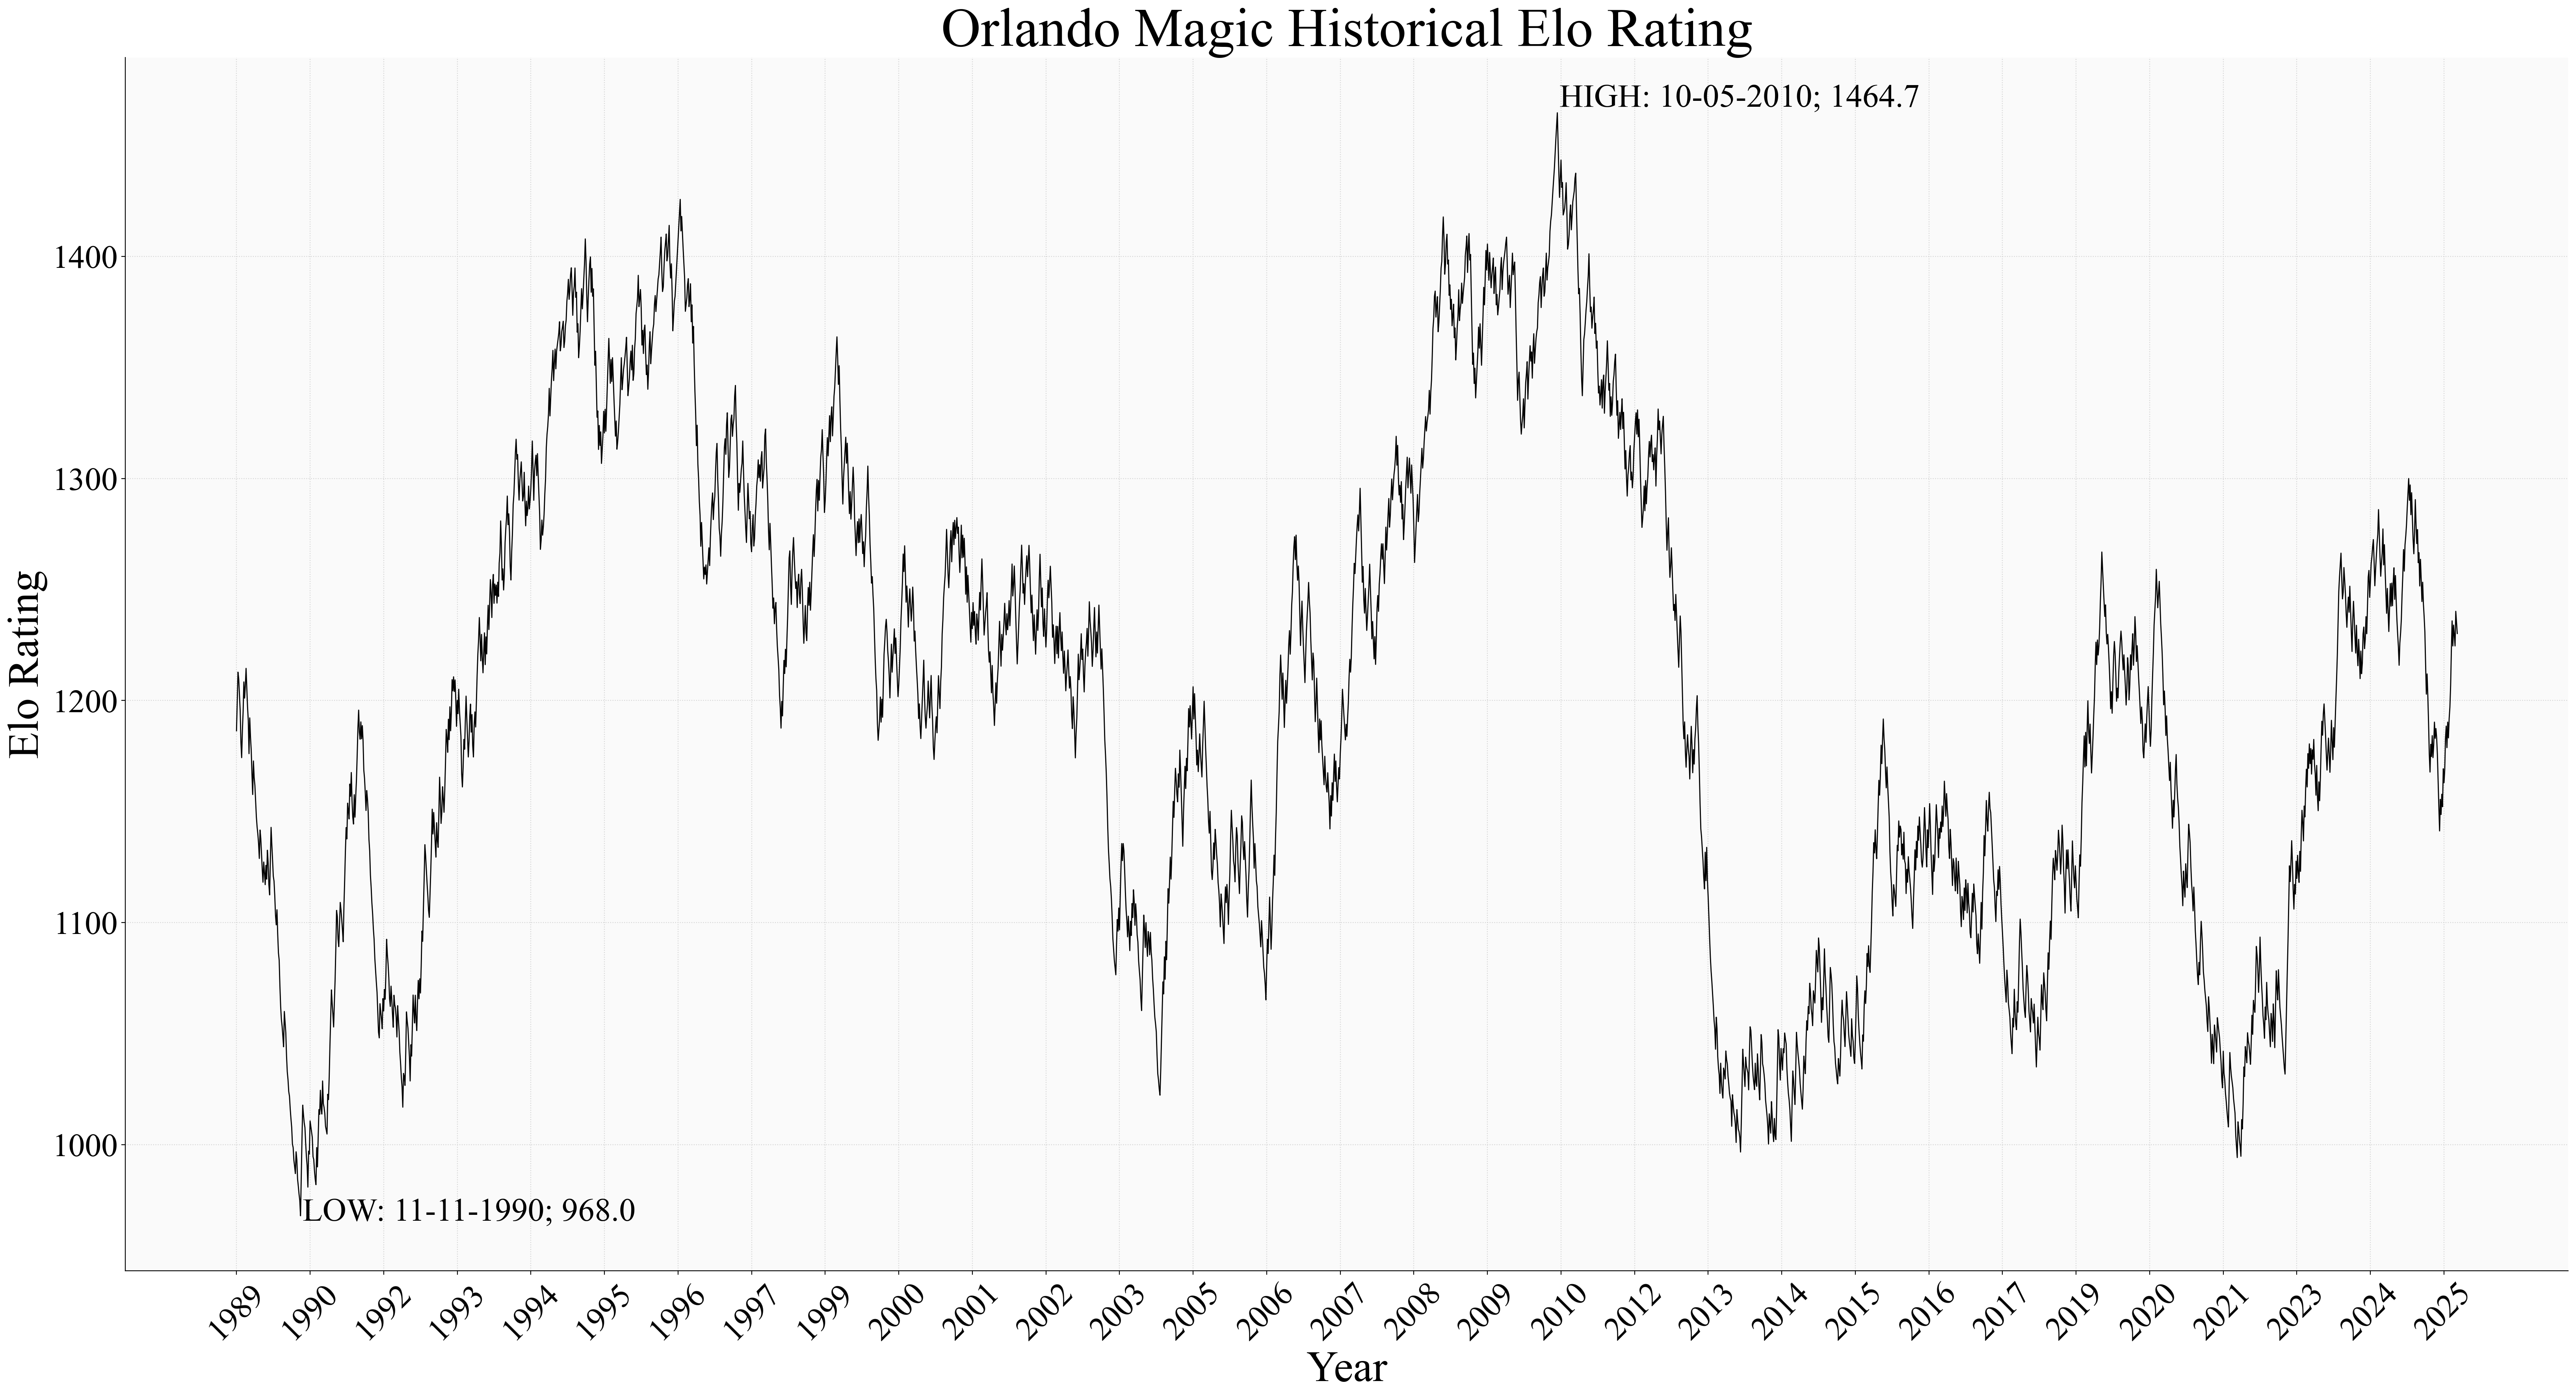

In [339]:
def get_team_graph(team_name):
    
    team_df = full_elo_data.loc[full_elo_data['team'] == team_name]
    team_df = team_df.reset_index(drop = True)
    
    plt.figure(figsize=(40, 20), dpi=200)
    
    ax = plt.axes()
    ax.set_facecolor("#fafafa")

    ax.grid(True, c="lightgrey", ls=":")

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    ax.tick_params(axis='x', labelsize=30)
    ax.tick_params(axis='y', labelsize=30)
    
    plt.title(f"{team_name} Historical Elo Rating", fontsize = 50)

    ax.set_xlabel("Year", fontsize=40)
    ax.set_ylabel("Elo Rating", fontsize=40)

    ax.plot(team_df.index, team_df['elo_rating'], linewidth=1, color="black", zorder=2)
    
    ticks = team_df.index[::100] 
    labels = team_df.loc[ticks, 'game_date'].dt.year
    ax.set_xticks(ticks)
    ax.set_xticklabels(labels, rotation = 45, fontsize = 30)
    
    team_max = team_df['elo_rating'].max()
    team_max_row = team_df.loc[team_df['elo_rating'] == team_max].iloc[0]

    ax.text(team_max_row.name + 3, team_max_row['elo_rating'] + 3, f"HIGH: {team_max_row['game_date'].strftime('%d-%m-%Y')}; {round(team_max_row['elo_rating'], 1)}", fontsize=30)
    
    team_min = team_df['elo_rating'].min()
    team_min_row = team_df.loc[team_df['elo_rating'] == team_min].iloc[0]
    
    ax.text(team_min_row.name + 3, team_min_row['elo_rating'] - 2, f"LOW: {team_min_row['game_date'].strftime('%d-%m-%Y')}; {round(team_min_row['elo_rating'], 1)}", fontsize=30)
    
    plt.savefig(f'{team_name}.jpeg', bbox_inches='tight', dpi=200)
    
    return plt

get_team_graph("Orlando Magic")